<a href="https://colab.research.google.com/github/titsitits/Python_Data_Science/blob/master/Completed_notebooks/5_Python_packages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mickaël Tits
CETIC
mickael.tits@cetic.be

# Chapitre 5 - Les librairies Python pour l'analyse de données

Une des grandes forces du langage de programmation Python est l'énorme communauté de développeurs qui développent et maintiennent un grand nombre de librairies, facilitant la vie desprogrammeurs. Ces librairies permettent d'utiliser des nouveaux types d'objets spécialisés, aux applications très variées, dont par exemple l'import/export/le traitement/la visualisation de données spécifiques, de l'analyse mathématique/statistique/scientifique poussée, l'interfaçage et la connecticité avec d'autres outils informatiques, etc.

Dans le domaine de l'analyse de données en particulier, voici une liste de librairies incontourables que nous allons voir dans le cadre de ce cours:
* [numpy](https://numpy.org/) : librairie de calcul scientifique (algèbre, calcul matriciel, stochastique, etc.)
* [scipy](https://www.scipy.org/): librairie de calcul scientifique et statistique (reposant sur numpy)
* [pandas](https://pandas.pydata.org/) : librairie permettant la représentation, la manipulation et l'analyse de données sous forme de tableaux (ou DataFrames)
* [matplotlib](https://matplotlib.org/) : librairie de visualisation graphique de données (voir Chapitre 6)


Pour importer un package, il faut tout d'abord qu'il soit installé sur la machine (ce qui est déjà fait la plupart du temps dans Google Colab).
Ensuite, il faut utiliser les mots-clés suivants:

**`import`** `package` **`as`** `alias`

ou:

**`from`** `package` **`import`** `subpackage` **`as`** `alias`



# `Numpy`
Numpy est une librairie de calcul mathématique. Elle inclut notamment l'objet **`ndarray`** (n-dimensional array) qui est une représentation d'un tableau multidimensionnel (un tenseur). On peut notamment utiliser cet objet pour représenter une matrice ou un vecteur. Le package dispose de nombreuses fonctions et méthodes permettant notamment des opérations algébriques sur ces objets, ou la génération de nombres aléatoires.

In [254]:
import numpy as np

price_list = [ 100000, 300000, 250000]

price_array = np.array(price_list)

print(price_array)

print("shape:", price_array.shape)
print("mean:", price_array.mean())
print("argmax:", price_array.argmax())
print("cumsum:", price_array.cumsum())


[100000 300000 250000]
shape: (3,)
mean: 216666.66666666666
argmax: 1
cumsum: [100000 400000 650000]


In [255]:
my_array1 = np.array([[1,2,3]])
my_array2 = np.array([[4,5,6]])

print(my_array1.shape)

#element-wise
print(my_array1*my_array2)
#matrix product
print(my_array1@my_array2.T)

(1, 3)
[[ 4 10 18]]
[[32]]


In [256]:
print("Opérations de base sur des listes => concaténation:", (price_list + price_list)*2)

Opérations de base sur des listes => concaténation: [100000, 300000, 250000, 100000, 300000, 250000, 100000, 300000, 250000, 100000, 300000, 250000]


In [257]:
print("Opérations de base sur un array => algèbre:", (price_array + price_array)*2/100%42)

Opérations de base sur un array => algèbre: [10. 30.  4.]


# `Scipy`

Scipy est une librairie de calcul scientifique, et plus particulièrement de statistiques.
Elle se base sur Numpy pour la représentation des données mathématiques.

In [258]:
from scipy import stats

#le package random permet de générer des nombres (pseudo-)aléatoires
from numpy import random as rnd

#génération d'un array contenant 100 valeurs aléatoires suivant une distribution gaussienne (randn = normal distribution; rand = uniform distribution)
my_array = rnd.randn(100)

#description statistique
stats.describe(my_array)

DescribeResult(nobs=100, minmax=(-2.7049695843355703, 2.235183666166914), mean=-0.015766665642478816, variance=1.1235496374115135, skewness=-0.004989029294480284, kurtosis=-0.34655634523783574)

In [259]:
#Distribution normale standard:
print(stats.norm.pdf(0), stats.norm.cdf(0))
stats.norm.cdf(1)-stats.norm.cdf(0)

0.3989422804014327 0.5


0.3413447460685429

Exemple: simulons une séquence de 100 jets de dés, et analysons les statistiques:

In [260]:
#Jet de dé: distribution uniforme et discrète des nombres [1,2,3,4,5,6]
#tosses = np.ceil(rnd.rand(100)*6).astype(int)
#plus rapide:
tosses = np.random.randint(1,7,100)
#print(tosses)
print(stats.describe(tosses))


DescribeResult(nobs=100, minmax=(1, 6), mean=3.37, variance=2.861717171717172, skewness=0.11210912745992012, kurtosis=-1.3164507689839462)


Exemple de test statistique: Student's t-test

In [261]:
stats.ttest_ind(rnd.randn(100), rnd.randn(100)+1)

Ttest_indResult(statistic=-7.364716107740974, pvalue=4.673548430752143e-12)

Analyse de variance:

In [262]:
stats.f_oneway(rnd.randn(100), rnd.randn(100)+1)

F_onewayResult(statistic=53.17535865184142, pvalue=7.154459070743476e-12)

# `Pandas`

Pandas est une librairie permettant la représentation, la manipulation et l'analyse de données sous forme de tableaux. 

La librairie dispose de deux objets centraux: 
* La **`Series`**: une série de données à une dimension
* Le **`Dataframe`**: un tableau de données à deux dimensions. (remarque: l'extraction d'une ligne ou d'une colonne d'un **`DataFrame`** donne une **`Series`**).

Ces deux objets disposent d'un grand nombre de fonctions et méthodes qui peuvent être utilisées pour accéder/manipuler/extraire/modifier/filtrer/ajouter/supprimer des données, et extraire des statistiques (aussi appelés **aggrégats**).

La liste complète des méthodes peut se trouver ici: [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html), [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)

## Reprenons l'inventaire des biens immobiliers

In [263]:
#Un inventaire de biens immobiliers

houses_dataset = {"address":["Rue de Fer 26, 5000 Namur",
                             "Rue de Bruxelles 42, 5000 Namur",
                      "Porte de Namur 25, Bruxelles",
                      "Rue de L'Eglise 42, Charleroi",
                      "Rue Saint-ghislain 30, 6224 Fleurus",
                     "Rue de la Closière 20, Fleurus",
                     "Rue de la Closière 20, Fleurus",
                     "Rue de Fer 25, 5000 Namur",
                     "Rue du Luxembourg 15, 1000 Bruxelles",
                     "NaN",
                     "Rue de Bruxelles 42, 5000 Namur",
                     "Rue de la Loi 50, Bruxelles"],
          "website":["immoweb","immoweb","immoweb","immoweb","immoweb","immoweb","immoweb","immovlan","immovlan","immovlan","immovlan","immovlan"],
           "price": [400000,
                     350000,
                     400000,
                     150000,
                     "330000",
                     230000,
                     230000,
                     0,
                     -100,
                     "cent mille",
                     350000,
                     700000],
           "surface":[150,
                      200,
                      120,
                      150,
                      320,
                      175,
                      170,
                      170,
                      100,
                      100,
                      200,
                      220],
                 "rooms":[4,5,3,5,5,2,3,3,"two",0,4,3]}

print(houses_dataset)

{'address': ['Rue de Fer 26, 5000 Namur', 'Rue de Bruxelles 42, 5000 Namur', 'Porte de Namur 25, Bruxelles', "Rue de L'Eglise 42, Charleroi", 'Rue Saint-ghislain 30, 6224 Fleurus', 'Rue de la Closière 20, Fleurus', 'Rue de la Closière 20, Fleurus', 'Rue de Fer 25, 5000 Namur', 'Rue du Luxembourg 15, 1000 Bruxelles', 'NaN', 'Rue de Bruxelles 42, 5000 Namur', 'Rue de la Loi 50, Bruxelles'], 'website': ['immoweb', 'immoweb', 'immoweb', 'immoweb', 'immoweb', 'immoweb', 'immoweb', 'immovlan', 'immovlan', 'immovlan', 'immovlan', 'immovlan'], 'price': [400000, 350000, 400000, 150000, '330000', 230000, 230000, 0, -100, 'cent mille', 350000, 700000], 'surface': [150, 200, 120, 150, 320, 175, 170, 170, 100, 100, 200, 220], 'rooms': [4, 5, 3, 5, 5, 2, 3, 3, 'two', 0, 4, 3]}


## Préparation du dataframe

In [264]:
import pandas as pd

df = pd.DataFrame(houses_dataset)
#print(df) #moins joli
display(df) #plus joli

,address,website,price,surface,rooms
0,"Rue de Fer 26, 5000 Namur",immoweb,400000,150,4
1,"Rue de Bruxelles 42, 5000 Namur",immoweb,350000,200,5
2,"Porte de Namur 25, Bruxelles",immoweb,400000,120,3
3,"Rue de L'Eglise 42, Charleroi",immoweb,150000,150,5
4,"Rue Saint-ghislain 30, 6224 Fleurus",immoweb,330000,320,5
5,"Rue de la Closière 20, Fleurus",immoweb,230000,175,2
6,"Rue de la Closière 20, Fleurus",immoweb,230000,170,3
7,"Rue de Fer 25, 5000 Namur",immovlan,0,170,3
8,"Rue du Luxembourg 15, 1000 Bruxelles",immovlan,-100,100,two
9,NaN,immovlan,cent mille,100,0


In [265]:
#convertir certaines colonnes en valeurs numériques (les valeurs invalides deviennent des NaN - not a number)
str_cols = df.columns[:2] #address, website
num_cols = df.columns[2:]# price, surface, rooms

for col in num_cols:
  df[col] = pd.to_numeric(df[col], errors = "coerce") #errors = "coerce" transforme en NaN les données qui ne peuvent être converties en nombre

df0 = df

df

,address,website,price,surface,rooms
0,"Rue de Fer 26, 5000 Namur",immoweb,400000.0,150,4.0
1,"Rue de Bruxelles 42, 5000 Namur",immoweb,350000.0,200,5.0
2,"Porte de Namur 25, Bruxelles",immoweb,400000.0,120,3.0
3,"Rue de L'Eglise 42, Charleroi",immoweb,150000.0,150,5.0
4,"Rue Saint-ghislain 30, 6224 Fleurus",immoweb,330000.0,320,5.0
5,"Rue de la Closière 20, Fleurus",immoweb,230000.0,175,2.0
6,"Rue de la Closière 20, Fleurus",immoweb,230000.0,170,3.0
7,"Rue de Fer 25, 5000 Namur",immovlan,0.0,170,3.0
8,"Rue du Luxembourg 15, 1000 Bruxelles",immovlan,-100.0,100,NaN
9,NaN,immovlan,NaN,100,0.0


## Concaténation de DataFrames

In [266]:
newhouses = pd.DataFrame({ "address": ["Rue de la Loi 51, Bruxelles", "Rue de la Loi 52, Bruxelles", "Rue de la Loi 53, Bruxelles", "Rue de Fer 27, Namur", "Rue de Fer 28, Namur", "Rue de Fer 29, Namur"], 
                          "website" : ["immoweb","immovlan","immovlan","immoweb","immoweb","immovlan"], 
                          "surface" : [120, 150, 170, 140, 160, 180], 
                          "price" : [280000, 400000, 480000, 280000, 320000, 350000], 
                          "rooms" : [3,4,5,3,4,5]})

df = pd.concat([df0, newhouses], ignore_index = True)

df1 = df#on le garde pour plus tard

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
7,"Rue de Fer 25, 5000 Namur",0.0,3.0,170,immovlan
8,"Rue du Luxembourg 15, 1000 Bruxelles",-100.0,NaN,100,immovlan
9,NaN,NaN,0.0,100,immovlan


## Accès aux données d'un dataframe

In [267]:
#Les labels du dataframe (i.e. les titres des lignes et des colonnes)
print(df.index) # labels des lignes
print(df.index.to_list()) # labels des lignes

RangeIndex(start=0, stop=18, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [268]:
print(df.columns) #labels des colonnes
print(df.columns.to_list()) #labels des colonnes

Index(['address', 'price', 'rooms', 'surface', 'website'], dtype='object')
['address', 'price', 'rooms', 'surface', 'website']


In [269]:
df.transpose() #permet de transposer le tableau

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
address,"Rue de Fer 26, 5000 Namur","Rue de Bruxelles 42, 5000 Namur","Porte de Namur 25, Bruxelles","Rue de L'Eglise 42, Charleroi","Rue Saint-ghislain 30, 6224 Fleurus","Rue de la Closière 20, Fleurus","Rue de la Closière 20, Fleurus","Rue de Fer 25, 5000 Namur","Rue du Luxembourg 15, 1000 Bruxelles",NaN,"Rue de Bruxelles 42, 5000 Namur","Rue de la Loi 50, Bruxelles","Rue de la Loi 51, Bruxelles","Rue de la Loi 52, Bruxelles","Rue de la Loi 53, Bruxelles","Rue de Fer 27, Namur","Rue de Fer 28, Namur","Rue de Fer 29, Namur"
price,400000,350000,400000,150000,330000,230000,230000,0,-100,NaN,350000,700000,280000,400000,480000,280000,320000,350000
rooms,4,5,3,5,5,2,3,3,NaN,0,4,3,3,4,5,3,4,5
surface,150,200,120,150,320,175,170,170,100,100,200,220,120,150,170,140,160,180
website,immoweb,immoweb,immoweb,immoweb,immoweb,immoweb,immoweb,immovlan,immovlan,immovlan,immovlan,immovlan,immoweb,immovlan,immovlan,immoweb,immoweb,immovlan


In [270]:
df.set_index("address") #permet de modifier l'index

,price,rooms,surface,website
address,,,,
"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
"Rue de Fer 25, 5000 Namur",0.0,3.0,170,immovlan
"Rue du Luxembourg 15, 1000 Bruxelles",-100.0,NaN,100,immovlan


In [271]:
#Accès à une colonne
print(df["price"])
#ou
df.price

0     400000.0
1     350000.0
2     400000.0
3     150000.0
4     330000.0
5     230000.0
6     230000.0
7          0.0
8       -100.0
9          NaN
10    350000.0
11    700000.0
12    280000.0
13    400000.0
14    480000.0
15    280000.0
16    320000.0
17    350000.0
Name: price, dtype: float64


0     400000.0
1     350000.0
2     400000.0
3     150000.0
4     330000.0
5     230000.0
6     230000.0
7          0.0
8       -100.0
9          NaN
10    350000.0
11    700000.0
12    280000.0
13    400000.0
14    480000.0
15    280000.0
16    320000.0
17    350000.0
Name: price, dtype: float64

In [272]:
#Accès à plusieurs colonnes
df[["price","surface"]]

,price,surface
0,400000.0,150
1,350000.0,200
2,400000.0,120
3,150000.0,150
4,330000.0,320
5,230000.0,175
6,230000.0,170
7,0.0,170
8,-100.0,100
9,NaN,100


In [273]:
#Accès à une ligne
#par label: loc
print(df.loc[0])

address    Rue de Fer 26, 5000 Namur
price                         400000
rooms                              4
surface                          150
website                      immoweb
Name: 0, dtype: object


In [274]:
#par un entier: iloc (dans ce cas ça revient au même puisque l'index correspond à des entiers de 0 à 11)
df.iloc[0]

address    Rue de Fer 26, 5000 Namur
price                         400000
rooms                              4
surface                          150
website                      immoweb
Name: 0, dtype: object

In [275]:
#Accès à une ligne
print(df.set_index("address").loc["NaN"])

price           NaN
rooms             0
surface         100
website    immovlan
Name: NaN, dtype: object


In [276]:
df.set_index("address").iloc[0]

price       400000
rooms            4
surface        150
website    immoweb
Name: Rue de Fer 26, 5000 Namur, dtype: object

In [277]:
#Accès à un/plusieurs élément(s)
df.iloc[0,0]

'Rue de Fer 26, 5000 Namur'

In [278]:
df.iloc[0:2,0:2]

,address,price
0,"Rue de Fer 26, 5000 Namur",400000.0
1,"Rue de Bruxelles 42, 5000 Namur",350000.0


In [279]:
df.loc[0,"price"]

400000.0

In [280]:
df.loc[0,["price","surface"]]

price      400000
surface       150
Name: 0, dtype: object

In [281]:
df.loc[0:3,["price","surface"]]

,price,surface
0,400000.0,150
1,350000.0,200
2,400000.0,120
3,150000.0,150


## Exploration statistique du dataframe


Avant même de corriger le dataframe, il peut être intéressant de réaliser une première exploration statistique, qui permet parfois de se rendre compte directement des données à corriger.

df.describe() permet de calculer différents aggrégats (des statistiques de base) pour toutes les colonnes numériques.

In [282]:
df.describe()

,price,rooms,surface
count,17.000000,17.000000,18.000000
mean,308817.647059,3.588235,166.388889
std,166402.795331,1.325652,50.695329
min,-100.000000,0.000000,100.000000
25%,230000.000000,3.000000,142.500000
50%,330000.000000,4.000000,165.000000
75%,400000.000000,5.000000,178.750000
max,700000.000000,5.000000,320.000000


* On remarque directement des données incohérentes: le prix minimum est négatif, et le nombre de pièces minimum est 0. Il faut donc au moins corriger ces deux caractéristiques.
* Il manque des valeurs pour les colonnes price et rooms (17 au lieu de 18). (Note: df.dropna() permet d'éliminer ces lignes invalides)
* Les valeurs moyennes et maximales semble cohérentes.

La méthode "groupby" permet de grouper les données selon leur adresse (on obtient un groupe par addresse unique), et la méthode "count" permet ensuite de compter les valeurs pour chaque groupe. Ceci permet de directement identifier les doublons, et les données non-valides.


In [283]:
df.groupby("address").count()

,price,rooms,surface,website
address,,,,
NaN,0,1,1,1
"Porte de Namur 25, Bruxelles",1,1,1,1
"Rue Saint-ghislain 30, 6224 Fleurus",1,1,1,1
"Rue de Bruxelles 42, 5000 Namur",2,2,2,2
"Rue de Fer 25, 5000 Namur",1,1,1,1
"Rue de Fer 26, 5000 Namur",1,1,1,1
"Rue de Fer 27, Namur",1,1,1,1
"Rue de Fer 28, Namur",1,1,1,1
"Rue de Fer 29, Namur",1,1,1,1



* On distingue 2 doublons: Rue de Bruxelles 42, 5000 Namur et Rue de la Closière 20, Fleurus

* On remarque aussi des données invalides pour deux adresses: il manque le prix pour "NaN", de le nombre de pièces pour "Rue du Luxembourg 15, 1000 Bruxelles"
* On aperçoit une adresse invalide: "NaN", qu'on peut enlever manuellement

Note: df.dropna() permet d'éliminer directement ces données invalides (des NaN)

On peut réaliser le même processus pour l'autre colonne textuelle: website

* On remarque en l'occurrence que plus de données viennent d'immoweb, et plus particulièrement que les données invalides viennent toutes de immovlan

In [284]:
df.groupby("website").count()

,address,price,rooms,surface
website,,,,
immovlan,8,7,7,8
immoweb,10,10,10,10


## Correction du dataframe en une seule instruction
* Retire les données invalides:
  * string à "NaN","" ou " "
  * nombre négatif
  * nombre défini à NaN
* Retire les doublons

In [285]:
#Correction du dataframe en une seule instruction: retire toutes les données invalides et les doublons
df = df[~df.address.isin(["NaN",""," "]) & \
        (df.price > 0) & (df.rooms > 0)]\
  .dropna()\
  .drop_duplicates("address")

df


,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
11,"Rue de la Loi 50, Bruxelles",700000.0,3.0,220,immovlan
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb
13,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan
14,"Rue de la Loi 53, Bruxelles",480000.0,5.0,170,immovlan


## Correction étape par étape

In [286]:
#On reprend le dataframe non-corrigé pour comparer
df = df1
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
7,"Rue de Fer 25, 5000 Namur",0.0,3.0,170,immovlan
8,"Rue du Luxembourg 15, 1000 Bruxelles",-100.0,NaN,100,immovlan
9,NaN,NaN,0.0,100,immovlan


In [287]:
#Pour les colonnes de texte, retirer les valeurs invalides (NaN ou "" ou " ")

#df = df[df.address != "NaN"]
#Ou pus complet
df = df[~df.address.isin(["NaN",""," "])]
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
7,"Rue de Fer 25, 5000 Namur",0.0,3.0,170,immovlan
8,"Rue du Luxembourg 15, 1000 Bruxelles",-100.0,NaN,100,immovlan
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan


In [288]:
#Elimine les lignes contenant des NaN
df = df.dropna()
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
7,"Rue de Fer 25, 5000 Namur",0.0,3.0,170,immovlan
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan
11,"Rue de la Loi 50, Bruxelles",700000.0,3.0,220,immovlan


In [289]:
#Retirer les valeurs numériques incohérentes
df = df[(df.price > 0) & (df.rooms > 0)]
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
1,"Rue de Bruxelles 42, 5000 Namur",350000.0,5.0,200,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
5,"Rue de la Closière 20, Fleurus",230000.0,2.0,175,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan
11,"Rue de la Loi 50, Bruxelles",700000.0,3.0,220,immovlan
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb


In [0]:
#On stocke la version avec doublons pour plus tard
dfdup = df

In [291]:
#Retirer les doublons

#df =df.drop_duplicates("address")
#Par défaut, le premier élément est gardé. On peut aussi garder le dernier (ce qui gardera notamment plus d'éléments d'immovlan)
df = dfdup.drop_duplicates("address", keep = "last")
df

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
10,"Rue de Bruxelles 42, 5000 Namur",350000.0,4.0,200,immovlan
11,"Rue de la Loi 50, Bruxelles",700000.0,3.0,220,immovlan
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb
13,"Rue de la Loi 52, Bruxelles",400000.0,4.0,150,immovlan
14,"Rue de la Loi 53, Bruxelles",480000.0,5.0,170,immovlan


In [292]:
#filtrer les données d'immoweb
df[df.website == "immoweb"]

,address,price,rooms,surface,website
0,"Rue de Fer 26, 5000 Namur",400000.0,4.0,150,immoweb
2,"Porte de Namur 25, Bruxelles",400000.0,3.0,120,immoweb
3,"Rue de L'Eglise 42, Charleroi",150000.0,5.0,150,immoweb
4,"Rue Saint-ghislain 30, 6224 Fleurus",330000.0,5.0,320,immoweb
6,"Rue de la Closière 20, Fleurus",230000.0,3.0,170,immoweb
12,"Rue de la Loi 51, Bruxelles",280000.0,3.0,120,immoweb
15,"Rue de Fer 27, Namur",280000.0,3.0,140,immoweb
16,"Rue de Fer 28, Namur",320000.0,4.0,160,immoweb


## Aggrégats

In [293]:
df.mean()

price      359230.769231
rooms           3.923077
surface       173.076923
dtype: float64

In [294]:
df[df.website == "immoweb"].mean()
#On remarque que les maisons d'immoweb sont en moyenne moins chère que la moyenne totale

price      298750.00
rooms           3.75
surface       166.25
dtype: float64

In [295]:
df.count()

address    13
price      13
rooms      13
surface    13
website    13
dtype: int64

## Comparer deux groupes (aggrégats groupés)
Avec Pandas, il est très facile de comparer différents groupes d'échantillons, grâce à la méthode `pandas.DataFrame.groupby`, qui permet de faire des aggrégats groupés.

Remarque: la méthode `pandas.DataFrame.groupby` renvoie en fait un objet d'un nouveau type (`GroupBy`), qui permet de gérer des groupements de données, et dispose de ses propres méthodes dont la liste complète peut se trouver ici: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

In [296]:
#Comparer les deux plateformes: c'est direct avec la méthode "groupby"
display(df.groupby("website").count())
display(df.groupby("website").mean())

,address,price,rooms,surface
website,,,,
immovlan,5,5,5,5
immoweb,8,8,8,8


,price,rooms,surface
website,,,
immovlan,456000.0,4.20,184.00
immoweb,298750.0,3.75,166.25


In [297]:
#Idem en gardant les doublons

display(dfdup.groupby("website").count())
display(dfdup.groupby("website").mean())

,address,price,rooms,surface
website,,,,
immovlan,5,5,5,5
immoweb,10,10,10,10


,price,rooms,surface
website,,,
immovlan,456000.0,4.2,184.0
immoweb,297000.0,3.7,170.5


Les chiffres* montrent que les maisons sur immovlan sont généralement plus grandes et plus chères.

\* (le dataset est bien évidemment simulé et trop petit pour donner des résultats significatifs)


Nous pouvons vérifier cette observation par un test statistique (e.g., Student's t-test), avec scipy.

In [298]:
from scipy import stats

stats.ttest_ind(df[df.website == "immoweb"].price, df[df.website == "immovlan"].price)
stats.f_oneway(df[df.website == "immoweb"].price, df[df.website == "immovlan"].price)


F_onewayResult(statistic=6.189988607254662, pvalue=0.030143997342091694)

# Exercice: les maisons plus grandes sont-elles plus chères ?

Divisez les maisons en deux groupes égaux (de part et d'autre de la surface médiane) et utilisez la méthode .describe() pour comparer les prix

## Solution

In [299]:
#df["large_houses"] = df.surface > df.surface.median()
#df.groupby("large_houses")["price"].describe()

#ou: (il n'est pas nécessaire d'ajouter une colonne dans le dataframe, 
#il suffit de donner comme argument du groupby une series de la même longueur que le dataframe)

is_large = df.surface > df.surface.median()
df.groupby(is_large)["price"].describe()

#ou directement:
df.groupby(df.surface > df.surface.median())["price"].describe()

,count,mean,std,min,25%,50%,75%,max
surface,,,,,,,,
False,7.0,318571.428571,92453.334432,150000.0,280000.0,320000.0,400000.0,400000.0
True,6.0,406666.666667,164276.190200,230000.0,335000.0,350000.0,447500.0,700000.0


In [300]:
#Bonus: Anova

#Pour avoir un code générique, ou extrait tous les groupes obtenus sous forme d'une liste
groups = df.groupby(is_large)["price"]
group_list = [g[1].values for g in groups]

#La méthode f_oneway prend autant d'arguments que d'échantillon à comparer. Pour transformer une liste en arguments, on utilise le symbole *
stats.f_oneway(*group_list)


F_onewayResult(statistic=1.4810829736928035, pvalue=0.24907116578758384)

In [301]:
#Bonus: corrélation
df[["price","surface"]].corr()

,price,surface
price,1.000000,0.233623
surface,0.233623,1.000000


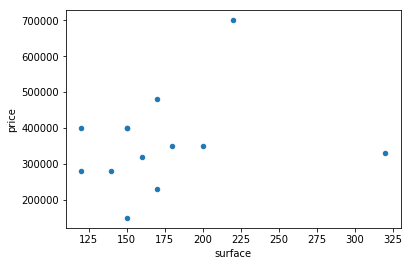

In [302]:
#Bonus: scatter plot (plus de détails au chapitre suivant)
df.plot.scatter("surface","price")

## Sauvegarder/charger un dataframe

In [0]:

df.to_csv("houses.csv") #tableau ascii (comma separated values)
df.to_hdf("houses.h5","df") #"Hierarchical Data Format". Format standard plus générique pour les ensembles de données
df.to_parquet("houses.parquet") #Format plus léger (compressé) et rapide à lire pour de gros volumes de données


In [304]:
#Dans un notebook, on peut appeler une ligne de commande linux grâce au symbole "!"
#le comande "ls" permet de lister les éléments du dossier courant. 
#Les lettre après le symbole "-" sont des options de la commande: 
#"l" permet un affichage plus détaillé, et "h" rend les données plus lisibles (affichage des tailles en Ko et Mo)
!ls -lh

total 1.1M
-rw-r--r-- 1 root root  787 Oct  9 10:29 houses.csv
-rw-r--r-- 1 root root 1.1M Oct  9 10:29 houses.h5
-rw-r--r-- 1 root root 3.1K Oct  9 10:29 houses.parquet
drwxr-xr-x 1 root root 4.0K Aug 27 16:17 sample_data


Vous pouvez également utiliser l'interface graphique de Google Colab pour accéder aux fichiers temporairement stockés dans la machine virtuelle.

Vous pouvez également utiliser cette interface pour télécharger (clic-droit sur le fichier) ou importer des fichiers.

<figure>
<center>
<img src='https://github.com/titsitits/Python_Data_Science/blob/master/Images/File_UI.png?raw=true' width="500" />
<figcaption>Accès aux fichiers dans Google Colab</figcaption></center>
</figure>

Vous pouvez maintenant passer au [Chapitre 6: Introduction au Data Mining et à la visualisation de données](https://colab.research.google.com/github/titsitits/UNamur_Python_Analytics/blob/master/6_Data_Mining.ipynb)